<a href="https://colab.research.google.com/github/gabrielborja/python_data_analysis/blob/main/norwegian_grammar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Norwegian verbs practice

## Uploading packages and data

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import json
import random
from datetime import datetime
import pytz
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
#Uploading google sheet from drive
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

wb = gc.open('norske_verb')
ws_data = wb.sheet1
records_1 = ws_data.get_all_records()

# Converting to a Pandas DataFrame
df1 = pd.DataFrame.from_records(records_1)
df1.head(1)

,gruppe,infinitiv,presens,preteritum,perfektum,imperativ,english,validated
0,A,å adlyde,adlyder,adlød,har adlydt,,Obey,


In [3]:
#Checking the dataframe info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   gruppe      392 non-null    object
 1   infinitiv   392 non-null    object
 2   presens     392 non-null    object
 3   preteritum  392 non-null    object
 4   perfektum   392 non-null    object
 5   imperativ   392 non-null    object
 6   english     392 non-null    object
 7   validated   392 non-null    object
dtypes: object(8)
memory usage: 24.6+ KB


##Generating JSON data

In [4]:
#Printing the number of key values available
for i in list(df1['gruppe'].unique()):
  print(i, end='-')

A-B-D-E-F-G-H-I-J-K-L-M-N-O-P-R-S-T-U-V-Ø-Å-

In [5]:
#Transforming dataframe to string (JSON format)
df1_str = df1.to_json(orient='records')

In [6]:
#Dumping string to JSON file
df1_json = json.loads(df1_str)

In [ ]:
#Selecting one arbitrary value from the JSON file
df1_json[-1]['english']

'Open'

In [ ]:
#Checking the JSON schema
df1_json[0]

{'english': 'Obey',
 'gruppe': 'A',
 'imperativ': None,
 'infinitiv': 'å adlyde',
 'perfektum': 'har adlydt',
 'presens': 'adlyder',
 'preteritum': 'adlød'}

In [7]:
#Creating functions to simulate a practice test

def sample_numbers(num1, num2, max_num=1):
  return random.sample(range(num1, num2), max_num)

def pick_word(i):
  print(f'\nVerb nummer: {i}')
  print('*'*30)
  for k, v in df1_json[i].items():
    print(f'{k}: {v}')
    print('-'*30)


if __name__ == '__main__':
  #Initializing variables
  test_result = []
  counter = 0
  sample_size = 30 #==> change this value

  #Generating unique sample numbers that don't repeat
  sample_indexes = [i for i in sample_numbers(0, len(df1_json), sample_size)] #==> data is shuffled
  
  for i in range(len(sample_indexes)):
    print(f'\nNum: {i+1}')
    pick_word(sample_indexes[i])
    answer = input('\nKjenner du dette verbet? (y/n)').strip().lower()
    test_result.append((sample_indexes[i], df1_json[sample_indexes[i]]['presens'], answer))
    clear_output()

  #print(test_result[-2:])

##Displaying Practice Results

In [8]:
#Displaying the results

score = 0
wrong_answers = []

for i in range(len(test_result)):
  if test_result[i][2] == 'y':
    score += 1
  else:
    wrong_answers.append(test_result[i][0])

final_score = round((score/len(sample_indexes))*100,1)
dt_now = str(datetime.now(tz=pytz.timezone('Europe/Oslo')))

print(f'Date of Practice: {dt_now}\n')

if final_score < 100:
  print(f'Your score: {final_score}/100')
  print('\nYou should review the following words:\n')
  for i in range(len(wrong_answers)):
    print(f'Verb: {wrong_answers[i]}:', df1_json[wrong_answers[i]]['presens'], '==> ', df1_json[wrong_answers[i]]['english'])
else:
  print(f'Your score: {final_score}/100')
  print('\nThanks for being awesome!!!')

Date of Practice: 2021-10-14 18:02:49.318801+02:00

Your score: 53.3/100

You should review the following words:

Verb: 156: klyver ==>  Climb
Verb: 125: hender ==>  Occur
Verb: 243: ror ==>  Row
Verb: 278: skynder ==>  Hurry, Hasten
Verb: 322: strir ==>  Struggle
Verb: 307: sprekker ==>  Crack, Burst
Verb: 385: vrir ==>  Twist
Verb: 212: overdriver ==>  Exaggerate
Verb: 70: flykter ==>  Flee
Verb: 71: flyter ==>  Float
Verb: 282: slipper ==>  Drop
Verb: 252: sager ==>  Saw
Verb: 170: kveler ==>  Choke, Strangle
Verb: 77: forklarer ==>  Explain


##Writing data to google sheets

In [9]:
#Selecting worksheet
ws_results = wb.worksheet('Sheet2')

In [ ]:
#Appending practice results to sheet
ws_results.append_row([dt_now, final_score])

##Visualizing practice results

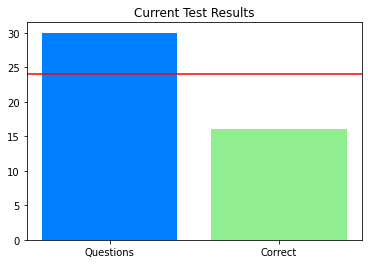

In [11]:
#Visualizing practice results

plt.bar([1, 2], [len(test_result), score], tick_label=['Questions', 'Correct'], color=['#007FFF', '#90EE90'])
plt.axhline(y=len(test_result)*0.8, color='r', linestyle='-')
plt.title('Current Test Results')
plt.show()

In [ ]:
!python -V

Python 3.7.12
